In [1]:
import numpy

In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import numpy as np
import pandas as pd
import scipy.io
from skimage.transform import resize
import matplotlib.pyplot as plt
from tqdm import tqdm
import gc
gc.collect()

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../17flowers"))

['trimaps', 'train_split.py', 'jpg2', 'jpg', 'preprocess.ipynb', '.ipynb_checkpoints', 'make_train.py', 'split_jpg.py', 'Untitled.ipynb', 'jpg (copy)', 'train_preprocess.py', 'test', 'TensorFlow-Tutorials', 'train']


In [3]:
!pip install scikit-image

    100% |████████████████████████████████| 12.4MB 92kB/s eta 0:00:011   40% |████████████▉                   | 5.0MB 18.1MB/s eta 0:00:01    65% |█████████████████████           | 8.1MB 16.8MB/s eta 0:00:01
    100% |████████████████████████████████| 4.4MB 246kB/s ta 0:00:011
    100% |████████████████████████████████| 3.3MB 330kB/s ta 0:00:011
    100% |████████████████████████████████| 143kB 2.9MB/s ta 0:00:01
    100% |████████████████████████████████| 1.6MB 649kB/s ta 0:00:011


In [8]:
mat = scipy.io.loadmat('trimaps/imlist.mat')

In [9]:
mat.keys()

dict_keys(['__header__', '__version__', '__globals__', 'imlist'])

In [11]:
type(mat['imlist']),mat['imlist'].shape

(numpy.ndarray, (1, 753))

In [12]:
type(mat['imlist'][0][0]),mat['imlist'][0][0].shape

(numpy.uint16, ())

In [13]:
[item.flat[0] for item in mat['imlist'][0][0]]

TypeError: 'numpy.uint16' object is not iterable

In [14]:
mat['imlist'][0][0]

1

In [15]:
mat['imlist'][0][1]

2

In [16]:
mat['imlist'][0][0].value()

AttributeError: 'numpy.uint16' object has no attribute 'value'

In [21]:
a=[]
for i in range(1,753):
    print(mat['imlist'][0][i])
    a.append(mat['imlist'][0][i])

2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
36
37
38
39
40
41
43
44
45
46
47
48
49
50
51
52
53
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
72
74
78
79
322
323
324
325
326
327
328
329
330
331
332
333
335
336
337
338
339
340
341
342
343
344
345
347
348
349
350
351
352
353
354
355
357
358
359
360
363
364
365
366
368
372
374
375
377
381
382
387
388
390
401
402
403
404
405
406
407
408
409
410
411
412
413
414
415
416
417
418
419
420
421
422
423
424
425
426
427
428
429
430
431
432
433
434
435
436
437
438
439
440
441
442
443
444
445
446
447
448
449
450
451
452
453
454
455
456
457
458
459
460
461
462
463
464
465
466
467
468
469
470
471
472
473
474
475
476
477
480
481
482
483
484
485
486
487
488
489
490
491
492
493
494
495
496
497
498
500
501
502
503
504
506
507
508
509
510
511
512
513
514
515
517
518
521
522
524
525
526
527
528
529
530
546
549
553
554
555
561
562
563
564
565
566
567
568
569
571
572
573
574
575
576
577
578
579
580
581
582
583
58

In [27]:
from PIL import Image #show one example of image

In [20]:
#load images as np arrays
def load_data(fpath):    
    img=Image.open(fpath).resize((224,224)) # resize to 224x224 for training purposes
    img = np.asarray(img, dtype='float32')
    return img

In [22]:
len(a)

752

In [32]:
#all images are loaded as np arrays
mask_images=[]
#input_labels=[]
#total=1361
j=1
for i in a: 
    fname="trimaps/image_"    
    fpath = os.path.join(fname + str(i).zfill(4) + ".png")
    print(fpath)
    mask_images.append(load_data(fpath))
   # input_labels.append(j) #labels are created as well
    #if i%80==0: j+=1


trimaps/image_0002.png
trimaps/image_0003.png
trimaps/image_0004.png
trimaps/image_0005.png
trimaps/image_0006.png
trimaps/image_0007.png
trimaps/image_0008.png
trimaps/image_0009.png
trimaps/image_0010.png
trimaps/image_0011.png
trimaps/image_0012.png
trimaps/image_0013.png
trimaps/image_0014.png
trimaps/image_0015.png
trimaps/image_0016.png
trimaps/image_0017.png
trimaps/image_0018.png
trimaps/image_0019.png
trimaps/image_0020.png
trimaps/image_0021.png
trimaps/image_0022.png
trimaps/image_0023.png
trimaps/image_0024.png
trimaps/image_0025.png
trimaps/image_0026.png
trimaps/image_0027.png
trimaps/image_0028.png
trimaps/image_0029.png
trimaps/image_0030.png
trimaps/image_0031.png
trimaps/image_0032.png
trimaps/image_0033.png
trimaps/image_0034.png
trimaps/image_0036.png
trimaps/image_0037.png
trimaps/image_0038.png
trimaps/image_0039.png
trimaps/image_0040.png
trimaps/image_0041.png
trimaps/image_0043.png
trimaps/image_0044.png
trimaps/image_0045.png
trimaps/image_0046.png
trimaps/ima

trimaps/image_0903.png
trimaps/image_0904.png
trimaps/image_0905.png
trimaps/image_0906.png
trimaps/image_0909.png
trimaps/image_0910.png
trimaps/image_0911.png
trimaps/image_0912.png
trimaps/image_0913.png
trimaps/image_0914.png
trimaps/image_0915.png
trimaps/image_0917.png
trimaps/image_0918.png
trimaps/image_0919.png
trimaps/image_0920.png
trimaps/image_0926.png
trimaps/image_0927.png
trimaps/image_0928.png
trimaps/image_0929.png
trimaps/image_0930.png
trimaps/image_0933.png
trimaps/image_0934.png
trimaps/image_0935.png
trimaps/image_0941.png
trimaps/image_0943.png
trimaps/image_0950.png
trimaps/image_0961.png
trimaps/image_0962.png
trimaps/image_0963.png
trimaps/image_0964.png
trimaps/image_0965.png
trimaps/image_0966.png
trimaps/image_0967.png
trimaps/image_0968.png
trimaps/image_0969.png
trimaps/image_0970.png
trimaps/image_0971.png
trimaps/image_0972.png
trimaps/image_0973.png
trimaps/image_0974.png
trimaps/image_0975.png
trimaps/image_0976.png
trimaps/image_0977.png
trimaps/ima

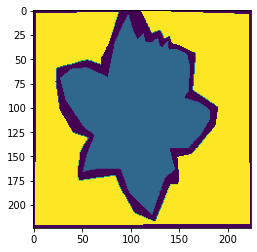

In [33]:
plt.imshow(mask_images[2])

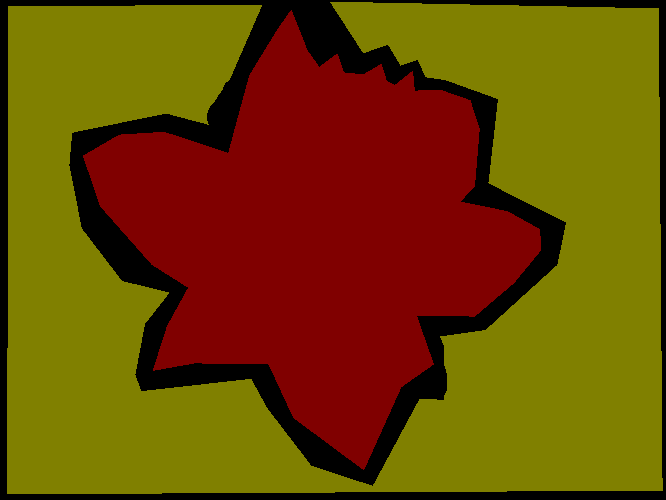

In [34]:
Image.open('trimaps/image_0004.png')

In [47]:
#this are the real images 
input_images=[]
#input_labels=[]
#total=1361
j=1
for i in a: 
    fname="jpg2/image_"    
    fpath = os.path.join(fname + str(i).zfill(4) + ".jpg")
    im = Image.open(fpath)
    im.save(os.path.join("new/image_" + str(i).zfill(4) + ".png"))
    print(fpath)
    #input_images.append(load_data(fpath))
   # input_labels.append(j) #labels are created as well
    #if i%80==0: j+=1

jpg2/image_0002.jpg
jpg2/image_0003.jpg
jpg2/image_0004.jpg
jpg2/image_0005.jpg
jpg2/image_0006.jpg
jpg2/image_0007.jpg
jpg2/image_0008.jpg
jpg2/image_0009.jpg
jpg2/image_0010.jpg
jpg2/image_0011.jpg
jpg2/image_0012.jpg
jpg2/image_0013.jpg
jpg2/image_0014.jpg
jpg2/image_0015.jpg
jpg2/image_0016.jpg
jpg2/image_0017.jpg
jpg2/image_0018.jpg
jpg2/image_0019.jpg
jpg2/image_0020.jpg
jpg2/image_0021.jpg
jpg2/image_0022.jpg
jpg2/image_0023.jpg
jpg2/image_0024.jpg
jpg2/image_0025.jpg
jpg2/image_0026.jpg
jpg2/image_0027.jpg
jpg2/image_0028.jpg
jpg2/image_0029.jpg
jpg2/image_0030.jpg
jpg2/image_0031.jpg
jpg2/image_0032.jpg
jpg2/image_0033.jpg
jpg2/image_0034.jpg
jpg2/image_0036.jpg
jpg2/image_0037.jpg
jpg2/image_0038.jpg
jpg2/image_0039.jpg
jpg2/image_0040.jpg
jpg2/image_0041.jpg
jpg2/image_0043.jpg
jpg2/image_0044.jpg
jpg2/image_0045.jpg
jpg2/image_0046.jpg
jpg2/image_0047.jpg
jpg2/image_0048.jpg
jpg2/image_0049.jpg
jpg2/image_0050.jpg
jpg2/image_0051.jpg
jpg2/image_0052.jpg
jpg2/image_0053.jpg


jpg2/image_0781.jpg
jpg2/image_0782.jpg
jpg2/image_0783.jpg
jpg2/image_0784.jpg
jpg2/image_0785.jpg
jpg2/image_0787.jpg
jpg2/image_0789.jpg
jpg2/image_0790.jpg
jpg2/image_0795.jpg
jpg2/image_0796.jpg
jpg2/image_0797.jpg
jpg2/image_0798.jpg
jpg2/image_0799.jpg
jpg2/image_0801.jpg
jpg2/image_0802.jpg
jpg2/image_0803.jpg
jpg2/image_0804.jpg
jpg2/image_0805.jpg
jpg2/image_0806.jpg
jpg2/image_0807.jpg
jpg2/image_0808.jpg
jpg2/image_0810.jpg
jpg2/image_0811.jpg
jpg2/image_0812.jpg
jpg2/image_0813.jpg
jpg2/image_0814.jpg
jpg2/image_0815.jpg
jpg2/image_0816.jpg
jpg2/image_0817.jpg
jpg2/image_0818.jpg
jpg2/image_0819.jpg
jpg2/image_0820.jpg
jpg2/image_0821.jpg
jpg2/image_0822.jpg
jpg2/image_0823.jpg
jpg2/image_0824.jpg
jpg2/image_0825.jpg
jpg2/image_0826.jpg
jpg2/image_0827.jpg
jpg2/image_0828.jpg
jpg2/image_0829.jpg
jpg2/image_0830.jpg
jpg2/image_0831.jpg
jpg2/image_0832.jpg
jpg2/image_0833.jpg
jpg2/image_0834.jpg
jpg2/image_0835.jpg
jpg2/image_0836.jpg
jpg2/image_0837.jpg
jpg2/image_0838.jpg


In [53]:
mask_images_arr = np.asarray(mask_images) # all of the images are converted to np array of (1360,224,224,3)
#labels = np.asarray(labels).reshape(1360,1) # labels are also converted to (1360,1)
mask_images_arr.shape

(752, 224, 224)

In [39]:
im = Image.open("jpg2/image_0004.jpg")
im.save("file.png")

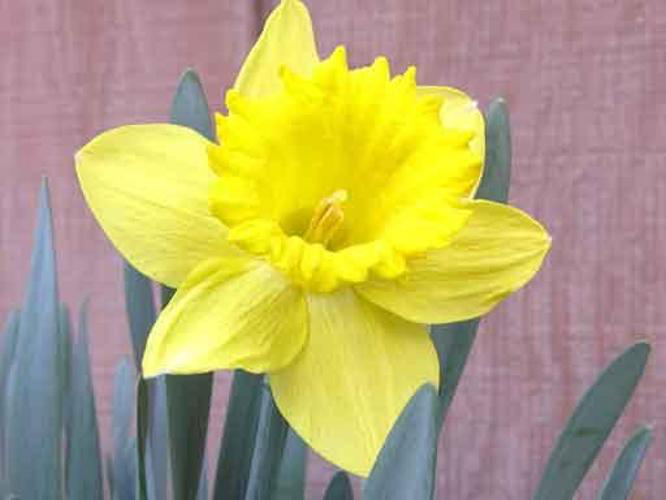

In [44]:
Image.open('file.png')

In [50]:
#this are the real images 
input1_images=[]
#input_labels=[]
#total=1361
j=1
for i in a: 
    fname="new/image_"    
    fpath = os.path.join(fname + str(i).zfill(4) + ".png")
    print(fpath)
    input1_images.append(load_data(fpath))

new/image_0002.png
new/image_0003.png
new/image_0004.png
new/image_0005.png
new/image_0006.png
new/image_0007.png
new/image_0008.png
new/image_0009.png
new/image_0010.png
new/image_0011.png
new/image_0012.png
new/image_0013.png
new/image_0014.png
new/image_0015.png
new/image_0016.png
new/image_0017.png
new/image_0018.png
new/image_0019.png
new/image_0020.png
new/image_0021.png
new/image_0022.png
new/image_0023.png
new/image_0024.png
new/image_0025.png
new/image_0026.png
new/image_0027.png
new/image_0028.png
new/image_0029.png
new/image_0030.png
new/image_0031.png
new/image_0032.png
new/image_0033.png
new/image_0034.png
new/image_0036.png
new/image_0037.png
new/image_0038.png
new/image_0039.png
new/image_0040.png
new/image_0041.png
new/image_0043.png
new/image_0044.png
new/image_0045.png
new/image_0046.png
new/image_0047.png
new/image_0048.png
new/image_0049.png
new/image_0050.png
new/image_0051.png
new/image_0052.png
new/image_0053.png
new/image_0055.png
new/image_0056.png
new/image_00

new/image_0812.png
new/image_0813.png
new/image_0814.png
new/image_0815.png
new/image_0816.png
new/image_0817.png
new/image_0818.png
new/image_0819.png
new/image_0820.png
new/image_0821.png
new/image_0822.png
new/image_0823.png
new/image_0824.png
new/image_0825.png
new/image_0826.png
new/image_0827.png
new/image_0828.png
new/image_0829.png
new/image_0830.png
new/image_0831.png
new/image_0832.png
new/image_0833.png
new/image_0834.png
new/image_0835.png
new/image_0836.png
new/image_0837.png
new/image_0838.png
new/image_0839.png
new/image_0840.png
new/image_0841.png
new/image_0842.png
new/image_0843.png
new/image_0844.png
new/image_0845.png
new/image_0848.png
new/image_0849.png
new/image_0850.png
new/image_0851.png
new/image_0852.png
new/image_0853.png
new/image_0854.png
new/image_0855.png
new/image_0862.png
new/image_0865.png
new/image_0866.png
new/image_0867.png
new/image_0873.png
new/image_0881.png
new/image_0883.png
new/image_0884.png
new/image_0885.png
new/image_0888.png
new/image_08

In [66]:
import shutil

In [67]:
for i in a:
    fname="trimaps/image_"    
    old_fpath = os.path.join(fname + str(i).zfill(4) + ".png")
   # old_image_path = os.path.join(folder_path, line.rstrip("\n"))
    new_path="annotations/image_"
    new_image_path = os.path.join(new_path+str(i).zfill(4) + ".png")
    shutil.move(old_fpath, new_image_path)

annotations has all the masks and new has all the real images

In [79]:
count=0
for i in a[:602]:
    count=count+1
    fname="new/image_"    
    old_fpath = os.path.join(fname + str(i).zfill(4) + ".png")
   # old_image_path = os.path.join(folder_path, line.rstrip("\n"))
    new_path="images_train/image_"
    new_image_path = os.path.join(new_path+str(i).zfill(4) + ".png")
    shutil.move(old_fpath, new_image_path)

FileNotFoundError: [Errno 2] No such file or directory: 'new/image_0002.png'

In [81]:
import os

list = os.listdir("images_train") # dir is your directory path
number_files = len(list)
print (number_files)

601


In [82]:
list = os.listdir("images_test") # dir is your directory path
number_files = len(list)
print (number_files)

151


In [83]:
list = os.listdir("annotations_train") # dir is your directory path
number_files = len(list)
print (number_files)

601


In [84]:
list = os.listdir("annotations_test") # dir is your directory path
number_files = len(list)
print (number_files)

151


In [101]:
from PIL import Image

def get_num_pixels(filepath):
    width, height = Image.open(filepath).size
    print(width)
    print(height)
    return width*height

print (get_num_pixels("images_train/image_0002.png"))

666
500
333000


In [102]:
print (get_num_pixels("annotations_train/image_0002.png"))

666
500
333000


In [99]:
%cd ..

/home/ai-students/Downloads/genie_2ndround/17flowers


In [104]:
from keras_segmentation.models.unet import vgg_unet

model = vgg_unet(n_classes=256 ,  input_height=224, input_width=224 )

model.train(
    train_images =  "images_train/",
    train_annotations = "annotations_train/",
    checkpoints_path = "vgg_unet_1" , epochs=5
)


  2%|▏         | 14/601 [00:00<00:04, 134.02it/s]

Verifying training dataset


100%|██████████| 601/601 [00:04<00:00, 134.17it/s]


Dataset verified! 
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/5
512/512 [==============================] - 609s 1s/step - loss: 0.2543 - accuracy: 0.9738
saved  vgg_unet_1.0
Epoch 2/5
512/512 [==============================] - 605s 1s/step - loss: 0.0140 - accuracy: 0.9984
saved  vgg_unet_1.1
Epoch 3/5
512/512 [==============================] - 611s 1s/step - loss: 0.0102 - accuracy: 0.9988
saved  vgg_unet_1.2
Epoch 4/5
512/512 [==============================] - 604s 1s/step - loss: 0.0153 - accuracy: 0.9981
saved  vgg_unet_1.3
Epoch 5/5
512/512 [==============================] - 602s 1s/step - loss: 0.0149 - accuracy: 0.9981
saved  vgg_unet_1.4


In [105]:
out = model.predict_segmentation(
    inp="images_test/image_1143.png",
    out_fname="out1.png"
)

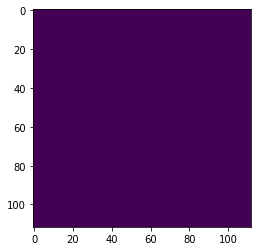

In [106]:
import matplotlib.pyplot as plt
plt.imshow(out)

In [107]:
# evaluating the model 
print(model.evaluate_segmentation( inp_images_dir="images_test/"  , annotations_dir="annotations_test/" ) )

151it [00:35,  4.30it/s]

{'frequency_weighted_IU': 0.9580441203699925, 'mean_IU': 0.0038234248227695467, 'class_wise_IU': array([0.97879675, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0

In [87]:
%cd image-segmentation-keras

/home/ai-students/Downloads/genie_2ndround/17flowers/image-segmentation-keras


In [93]:
!python -m keras_segmentation verify_dataset \
 --images_path="../images_train/" \
 --segs_path="../annotations_train/"  \
 --n_classes=256

Using TensorFlow backend.
/home/ai-students/newfairseq/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/ai-students/newfairseq/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/ai-students/newfairseq/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/ai-students/newfairseq/lib/pytho

In [103]:
!python -m keras_segmentation train \
 --checkpoints_path="my_vggunet" \
 --train_images="images_train/" \
 --train_annotations="annotations_train/" \
 --val_images="images_test/" \
 --val_annotations="annotations_test/" \
 --n_classes=256 \
 --input_height=500 \
 --input_width=666 \
 --model_name="vgg_unet"

Using TensorFlow backend.
/home/ai-students/newfairseq/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/ai-students/newfairseq/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/ai-students/newfairseq/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/ai-students/newfairseq/lib/pytho

In [77]:
a[600]

1142

In [78]:
a[601]

1143

Populating the interactive namespace from numpy and matplotlib


/home/ai-students/newfairseq/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['mat', 'resize']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


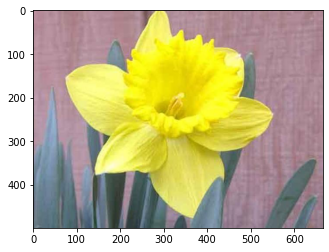

In [52]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img=mpimg.imread('new/image_0004.png')
imgplot = plt.imshow(img)
plt.show()

In [60]:
from keras_segmentation.models.unet import vgg_unet

Using TensorFlow backend.
/home/ai-students/newfairseq/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/ai-students/newfairseq/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/ai-students/newfairseq/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/ai-students/newfairseq/lib/pytho

Error in loading augmentation, can't import imgaug.Please make sure it is installed.


/home/ai-students/newfairseq/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/ai-students/newfairseq/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/ai-students/newfairseq/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/ai-students/newfairseq/lib/python3.6/

In [55]:
!git clone https://github.com/divamgupta/image-segmentation-keras

Cloning into 'image-segmentation-keras'...
remote: Enumerating objects: 22, done.
remote: Counting objects: 100% (22/22), done.
remote: Compressing objects: 100% (22/22), done.
remote: Total 753 (delta 7), reused 0 (delta 0), pack-reused 731
Receiving objects: 100% (753/753), 3.18 MiB | 4.10 MiB/s, done.
Resolving deltas: 100% (447/447), done.


In [58]:
%cd image-segmentation-keras

/home/ai-students/Downloads/genie_2ndround/17flowers/image-segmentation-keras


In [59]:
!python setup.py install

running install
running bdist_egg
running egg_info
creating keras_segmentation.egg-info
writing keras_segmentation.egg-info/PKG-INFO
writing dependency_links to keras_segmentation.egg-info/dependency_links.txt
writing entry points to keras_segmentation.egg-info/entry_points.txt
writing requirements to keras_segmentation.egg-info/requires.txt
writing top-level names to keras_segmentation.egg-info/top_level.txt
writing manifest file 'keras_segmentation.egg-info/SOURCES.txt'
reading manifest file 'keras_segmentation.egg-info/SOURCES.txt'
writing manifest file 'keras_segmentation.egg-info/SOURCES.txt'
installing library code to build/bdist.linux-x86_64/egg
running install_lib
running build_py
creating build
creating build/lib
creating build/lib/keras_segmentation
copying keras_segmentation/__init__.py -> build/lib/keras_segmentation
copying keras_segmentation/pretrained.py -> build/lib/keras_segmentation
copying keras_segmentation/predict.py -> build/lib/keras_segmentation
copying keras_se

Best match: imgaug 0.2.9
Processing imgaug-0.2.9-py2.py3-none-any.whl
Installing imgaug-0.2.9-py2.py3-none-any.whl to /home/ai-students/newfairseq/lib/python3.6/site-packages
writing requirements to /home/ai-students/newfairseq/lib/python3.6/site-packages/imgaug-0.2.9-py3.6.egg/EGG-INFO/requires.txt
Adding imgaug 0.2.9 to easy-install.pth file

Installed /home/ai-students/newfairseq/lib/python3.6/site-packages/imgaug-0.2.9-py3.6.egg
Searching for imageio==2.5.0
Reading https://pypi.python.org/simple/imageio/
Best match: imageio 2.5.0
Processing imageio-2.5.0-py3-none-any.whl
Installing imageio-2.5.0-py3-none-any.whl to /home/ai-students/newfairseq/lib/python3.6/site-packages
writing requirements to /home/ai-students/newfairseq/lib/python3.6/site-packages/imageio-2.5.0-py3.6.egg/EGG-INFO/requires.txt
Adding imageio 2.5.0 to easy-install.pth file
Installing imageio_download_bin script to /home/ai-students/newfairseq/bin
Installing imageio_remove_bin script to /home/ai-students/newfairseq

In [61]:
from keras_segmentation.pretrained import pspnet_50_ADE_20K , pspnet_101_cityscapes, pspnet_101_voc12

model = pspnet_50_ADE_20K() # load the pretrained model trained on ADE20k dataset

187842560/187839752 [==============================] - 23s 0us/step




In [63]:
%cd ..

/home/ai-students/Downloads/genie_2ndround/17flowers


In [64]:
out = model.predict_segmentation(
    inp="jpg2/image_0002.jpg",
    out_fname="out.png"
)

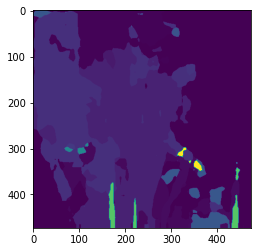

In [65]:

import matplotlib.pyplot as plt
plt.imshow(out)
